In [1]:
!pip install folium selenium shapely
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandasql import sqldf
from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import requests
from selenium import webdriver
import time
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
from shapely.geometry import Point


In [2]:
#retreive data from  https://en.wikipedia.org/wiki/List_of_postal_codes_in_Nepal,
url = "https://github.com/unknown095/IDS-projects/blob/main/Book%20(1).csv"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-f83e85cbe130793efdd6ea41c160f065.css" integrity="sha512-+D6Fy+EweT791upBwWDwZQxdKdpY58/tEdY1xnOvq7urHPMZe2ZtMhRmzWUL6+Dknj2BwHdlVvxPHDB6ep7wQQ==" media="all" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-07eb9a80f5cb23c5e84ad18f73d0eb43.css" integrity="sha512-B+uagPXLI8XoStGPc9DrQ9xVWfBS0VvAKvYTQopaizdxo8T46TCtAVE9sY15FQ0kseA1LB3V5GKklDGuwjqCHg==" media="all" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/behaviors-060bad9e1c3288a40b14376c2e737e0b.css" integr

In [3]:
table = soup.find_all('table')[0]                   #store as table
df = pd.read_html(str(table))                       #create df
data = pd.read_json(df[0].to_json(orient='records'))
data.head()

,Unnamed: 0,Column1,Location,Ward,City,latitude,longitude,Area(sq km),Population Density (per sq km)
0,NaN,0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,1.3818,5795
1,NaN,1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,0.8181,16438
2,NaN,2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,3.0854,11300
3,NaN,3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,3.3498,14139
4,NaN,4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,0.7875,23263


In [4]:
data1=data[["Location","Ward","City","latitude","longitude","Population Density (per sq km)"]]

In [5]:
data1.isnull().sum()

Location                          1
Ward                              0
City                              0
latitude                          1
longitude                         1
Population Density (per sq km)    0
dtype: int64

In [6]:
data1=data1.replace("",0)

In [7]:
data1.isna().sum()

Location                          1
Ward                              0
City                              0
latitude                          1
longitude                         1
Population Density (per sq km)    0
dtype: int64

In [8]:
data1=data1.dropna()

In [9]:
data1.isnull().sum()

Location                          0
Ward                              0
City                              0
latitude                          0
longitude                         0
Population Density (per sq km)    0
dtype: int64

In [10]:
data1.isna().sum()

Location                          0
Ward                              0
City                              0
latitude                          0
longitude                         0
Population Density (per sq km)    0
dtype: int64

In [11]:
data1

,Location,Ward,City,latitude,longitude,Population Density (per sq km)
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263
5,Bouddha,Ward 6,Kathmandu,27.722053,85.362081,16726
6,Mitrapark,Ward 7,Kathmandu,27.713360,85.345041,29507
7,Jayabageshwori,Ward 8,Kathmandu,27.710336,85.344025,3680
8,Gaushala,Ward 9,Kathmandu,27.709706,85.346409,13742
9,New Baneshwor,Ward 10,Kathmandu,27.692621,85.338072,25455


In [12]:
data1.shape

(51, 6)

In [13]:
geodata=data1[["latitude","longitude"]]
geodata.head()

,latitude,longitude
0,27.712678,85.328703
1,27.721508,85.320765
2,27.733079,85.328807
3,27.724603,85.331017
4,27.717231,85.330449


In [14]:
data1['Coordinates']=list(zip(data1["latitude"],data1["longitude"]))
data1.head()

,Location,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)"
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)"
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)"
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)"
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)"


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        51 non-null     object 
 1   Ward                            51 non-null     object 
 2   City                            51 non-null     object 
 3   latitude                        51 non-null     float64
 4   longitude                       51 non-null     float64
 5   Population Density (per sq km)  51 non-null     int64  
 6   Coordinates                     51 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.2+ KB


In [16]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [17]:
import pandas, os, geopy
from geopy.geocoders import Nominatim

In [18]:
geolocator = Nominatim(user_agent="coursera")
address = 'Kathmandu'
try:
    location = geolocator.geocode(address)
    latitude = data1['latitude'].astype(float)
    longitude = data1['longitude'].astype(float)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinates of {} are {}, {}.'.format(address, latitude, longitude))
except AttributeError:
    print('Cannot find: {}, will drop index: {}'.format(address, index))

my_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(data1['latitude'],data1['longitude'], data1['Location']):
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(my_map)  
    
my_map

The geograpical coordinates of Kathmandu are 27.708317, 85.3205817.


In [19]:
address = 'Kathmandu, Nepal'

geolocator = Nominatim(user_agent='coursera')
location = geolocator.geocode(address)
latitude = data1['latitude']
longitude = data1['longitude']
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of Kathmandu are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the City of Kathmandu are 27.708317, 85.3205817.


In [20]:
import folium

In [21]:
data1.head()

,Location,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)"
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)"
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)"
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)"
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)"


In [22]:
map_kat=folium.Map(location=[(latitude),(longitude)],zoom_start=10)

In [23]:
for lat, lng, Location, City in zip(data1['latitude'], data1['longitude'], data1['Location'], data1['City']):
    label = '{}, {}'.format(City, Location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kat)  
    
map_kat

In [24]:
CLIENT_ID = 'PFMCEGVYKJ4VWFKRNXJKHUXUEAEFU0DD1RJUPLNRHSEJXLIX' # your Foursquare ID
CLIENT_SECRET = 'NSEGOTA1QSUTNLI02ZHR5QP4B1SFSB0VC0CQMD0BFSHOIEOG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PFMCEGVYKJ4VWFKRNXJKHUXUEAEFU0DD1RJUPLNRHSEJXLIX
CLIENT_SECRET:NSEGOTA1QSUTNLI02ZHR5QP4B1SFSB0VC0CQMD0BFSHOIEOG


In [25]:
merge_kat=data1[data1['City'].str.contains('Kathmandu')]
kat_data = merge_kat.reset_index(drop=True)
kat_data.head()

,Location,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)"
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)"
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)"
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)"
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)"


In [26]:
map_kat = folium.Map(location=[latitude, longitude], zoom_start=12.5)


In [27]:
for lat, lng, city, location in zip(kat_data['latitude'], kat_data['longitude'], kat_data['City'], kat_data['Location']):
    label = '{}, {}'.format(location, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_kat)  
    
map_kat

In [28]:
kat_data.head()

,Location,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)"
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)"
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)"
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)"
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)"


In [29]:
near_latitude = kat_data.loc[0, 'latitude'] # neighbourhood latitude value
near_longitude = kat_data.loc[0, 'longitude'] # neighbourhood longitude value

near_name = kat_data.loc[0, 'Location'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(near_name, 
                                                               near_latitude, 
                                                               near_longitude))

Latitude and longitude values of Naxal are 27.7126782, 85.3287033.


In [30]:
LIMIT = 100
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    near_latitude, 
    near_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PFMCEGVYKJ4VWFKRNXJKHUXUEAEFU0DD1RJUPLNRHSEJXLIX&client_secret=NSEGOTA1QSUTNLI02ZHR5QP4B1SFSB0VC0CQMD0BFSHOIEOG&v=20180605&ll=27.7126782,85.3287033&radius=5000&limit=100'

In [31]:
result=requests.get(url).json()

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
venues = result['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode,venue.location.crossStreet,venue.location.neighborhood
0,e-0-4d578c7a5ba05481a7ac0646-0,0,"[{'summary': 'This spot is popular', 'type': '...",4d578c7a5ba05481a7ac0646,Oriental Kitchen,Bhat Bhateni,27.718292,85.330758,"[{'label': 'display', 'lat': 27.71829237926592...",656,...,काठमाडौं,Central Region,नेपाल,"[Bhat Bhateni, काठमाडौं, नेपाल]","[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",0,[],NaN,NaN,NaN
1,e-0-4bd1006a20cd9960229f2e9e-1,0,"[{'summary': 'This spot is popular', 'type': '...",4bd1006a20cd9960229f2e9e,Dwarika Hotel,Battisputali Rd.,27.705154,85.342620,"[{'label': 'display', 'lat': 27.70515441952765...",1607,...,काठमाडौं,Central Region,नेपाल,"[Battisputali Rd., काठमाडौं 44600, नेपाल]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],44600,NaN,NaN
2,e-0-519708e6498eb4bdf07a339b-2,0,"[{'summary': 'This spot is popular', 'type': '...",519708e6498eb4bdf07a339b,Akuj,NaN,27.720917,85.327903,"[{'label': 'display', 'lat': 27.72091690222548...",920,...,काठमाडौं,Central Region,नेपाल,"[काठमाडौं, नेपाल]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
3,e-0-4c3aa74eb22895214101f70c-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c3aa74eb22895214101f70c,Himalayan Java,Tredevi Marg,27.714061,85.313968,"[{'label': 'display', 'lat': 27.71406130628915...",1460,...,काठमाडौं,Central Region,नेपाल,"[Tredevi Marg (Thamel), काठमाडौं NP, नेपाल]","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NP,Thamel,NaN
4,e-0-4e0dde8bb0fb59de67d04acc-4,0,"[{'summary': 'This spot is popular', 'type': '...",4e0dde8bb0fb59de67d04acc,Bhojan Griha,NaN,27.706485,85.325346,"[{'label': 'display', 'lat': 27.70648460447188...",764,...,काठमाडौं,Central Region,नेपाल,"[काठमाडौं, नेपाल]","[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",0,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,e-0-4e570537fa7624d9bbabae69-69,0,"[{'summary': 'This spot is popular', 'type': '...",4e570537fa7624d9bbabae69,Domestic Terminal,Tribhuvan International Airport,27.702303,85.359119,"[{'label': 'display', 'lat': 27.70230302014127...",3212,...,काठमाडौं,Central Region,नेपाल,"[Tribhuvan International Airport, काठमाडौं, ने...","[{'id': '4bf58dd8d48988d1eb931735', 'name': 'A...",0,[],NaN,NaN,NaN
70,e-0-523c766f498e95167358d438-70,0,"[{'summary': 'This spot is popular', 'type': '...",523c766f498e95167358d438,Bouddhanath Temple,NaN,27.721448,85.362112,"[{'label': 'display', 'lat': 27.721448, 'lng':...",3433,...,NaN,NaN,नेपाल,[नेपाल],"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",0,[],NaN,NaN,NaN
71,e-0-4ed9ae25b8f7fcd03f70aaf2-71,0,"[{'summary': 'This spot is popular', 'type': '...",4ed9ae25b8f7fcd03f70aaf2,Green Hotel,NaN,27.720896,85.364769,"[{'label': 'display', 'lat': 27.72089630543294...",3669,...,NaN,Nepal,नेपाल,[नेपाल],"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN,NaN
72,e-0-4eb8f1fb2c5b53141bcd3ec7-72,0,"[{'summary': 'This spot is popular', 'type': '...",4eb8f1fb2c5b53141bcd3ec7,Lotus Guest House,NaN,27.722759,85.365187,"[{'label': 'display', 'lat': 27.72275872720191...",3766,...,NaN,NaN,नेपाल,[नेपाल],"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN,NaN


In [34]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_kat=nearby_venues
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Oriental Kitchen,Asian Restaurant,27.718292,85.330758
1,Dwarika Hotel,Hotel,27.705154,85.342620
2,Akuj,Café,27.720917,85.327903
3,Himalayan Java,Coffee Shop,27.714061,85.313968
4,Bhojan Griha,Asian Restaurant,27.706485,85.325346


In [35]:
nearby_kat=pd.pivot_table(nearby_kat,columns=['categories'], aggfunc='size')
nearby_kat

categories
Airport Lounge                    1
Airport Terminal                  1
Asian Restaurant                  7
Bakery                            3
Bar                               2
Beer Garden                       1
Buddhist Temple                   2
Business Service                  1
Café                             11
Casino                            1
Coffee Shop                       6
Cuban Restaurant                  1
Diner                             1
Fast Food Restaurant              2
Gym                               1
Halal Restaurant                  1
Historic Site                     3
History Museum                    1
Hookah Bar                        1
Hostel                            1
Hotel                             7
Hotel Bar                         1
Indian Restaurant                 2
Italian Restaurant                4
Pizza Place                       1
Restaurant                        4
Road                              1
Spanish Restauran

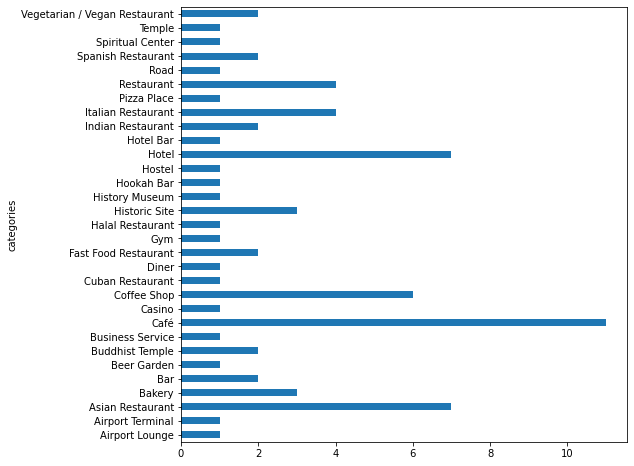

In [130]:
nearby_kat.plot(kind='barh',figsize=(8,8))

In [36]:
nearby_venues['categories'].describe()

count       74
unique      31
top       Café
freq        11
Name: categories, dtype: object

In [37]:
nearby_venues['categories'].sum().split()

['Asian',
 'RestaurantHotelCaféCoffee',
 'ShopAsian',
 'RestaurantItalian',
 'RestaurantHotelAsian',
 'RestaurantBarItalian',
 'RestaurantHotel',
 'BarHistoric',
 'SiteBakeryBeer',
 'GardenCoffee',
 'ShopVegetarian',
 '/',
 'Vegan',
 'RestaurantRoadHookah',
 'BarDinerItalian',
 'RestaurantRestaurantTempleAsian',
 'RestaurantHalal',
 'RestaurantCoffee',
 'ShopCuban',
 'RestaurantRestaurantRestaurantFast',
 'Food',
 'RestaurantBarHostelAsian',
 'RestaurantBuddhist',
 'TempleCaféCoffee',
 'ShopCaféSpanish',
 'RestaurantHistoric',
 'SiteCaféBusiness',
 'ServiceBuddhist',
 'TempleCaféPizza',
 'PlaceHistory',
 'MuseumIndian',
 'RestaurantBakerySpanish',
 'RestaurantCaféBakeryIndian',
 'RestaurantHotelHotelCaféItalian',
 'RestaurantVegetarian',
 '/',
 'Vegan',
 'RestaurantCaféHotelSpiritual',
 'CenterCoffee',
 'ShopCaféCasinoFast',
 'Food',
 'RestaurantAsian',
 'RestaurantAsian',
 'RestaurantAirport',
 'LoungeRestaurantCaféGymCoffee',
 'ShopAirport',
 'TerminalHistoric',
 'SiteHotelHotelCafé'

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
kat_data.head()

,Location,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)"
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)"
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)"
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)"
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)"


In [40]:
venues = getNearbyVenues(names=kat_data['Location'],latitudes=kat_data['latitude'],longitudes=kat_data['longitude'])

Naxal
Lazimpat
Maharajgunj
Baluwatar,
Tangal
Bouddha
Mitrapark
Jayabageshwori
Gaushala
New Baneshwor
Tripureshwor
Kalimati
Kalanki
Swayambhu
Sohrakhutte
Chhetrapati
Bhimsenthan
Om Bahal
Lainchaur
Purano Buspark
Dillibazar
Gyaneshwor
Bhimsengola
Koteshwor


In [41]:
print(venues.shape)
venues.head()

(261, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Naxal,27.712678,85.328703,Wunjala Moskva,27.714212,85.328233,Restaurant
1,Naxal,27.712678,85.328703,Brian's Grill House,27.708351,85.327781,American Restaurant
2,Naxal,27.712678,85.328703,Tamaslaya,27.714850,85.326449,Café
3,Naxal,27.712678,85.328703,Big Movies,27.709667,85.326619,Multiplex
4,Naxal,27.712678,85.328703,City Centre,27.709703,85.326651,Shopping Mall


In [42]:
venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Baluwatar,",8,8,8,8,8,8
Bhimsengola,5,5,5,5,5,5
Bhimsenthan,17,17,17,17,17,17
Bouddha,20,20,20,20,20,20
Chhetrapati,28,28,28,28,28,28
Dillibazar,10,10,10,10,10,10
Gaushala,4,4,4,4,4,4
Gyaneshwor,4,4,4,4,4,4
Jayabageshwori,8,8,8,8,8,8


In [43]:
print('There are {} unique categories.'.format(len(venues['Venue Category'].unique())))

There are 75 unique categories.


In [44]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighbourhood'] = venues['Neighbourhood'] 

onehot.head()

,American Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Breakfast Spot,...,Soccer Stadium,Spa,Spanish Restaurant,Spiritual Center,Temple,Tourist Information Center,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Naxal
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Naxal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Naxal
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Naxal
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Naxal


In [45]:
onehot.shape

(261, 76)

In [46]:
grouped = onehot.groupby('Neighbourhood').mean().reset_index()
grouped

,Neighbourhood,American Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Boarding House,...,Snack Place,Soccer Stadium,Spa,Spanish Restaurant,Spiritual Center,Temple,Tourist Information Center,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,"Baluwatar,",0.000000,0.000000,0.000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0
1,Bhimsengola,0.000000,0.000000,0.200,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.2
2,Bhimsenthan,0.000000,0.058824,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0
3,Bouddha,0.000000,0.100000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.05,0.05,0.000000,0.000000,0.050000,0.000000,0.0
4,Chhetrapati,0.000000,0.142857,0.000,0.000000,0.071429,0.035714,0.035714,0.035714,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.035714,0.000000,0.035714,0.000000,0.0
5,Dillibazar,0.100000,0.100000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0
6,Gaushala,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,...,0.000000,0.000000,0.00,0.00,0.00,0.250000,0.000000,0.000000,0.000000,0.0
7,Gyaneshwor,0.250000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0
8,Jayabageshwori,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0
9,Kalanki,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0


In [47]:
grouped.shape

(24, 76)

In [48]:
num_top_venues = 5

for hood in grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baluwatar,----
            venue  freq
0      Restaurant  0.25
1            Café  0.25
2  Breakfast Spot  0.25
3          Bakery  0.12
4           Diner  0.12


----Bhimsengola----
                venue  freq
0         Yoga Studio   0.2
1  Athletics & Sports   0.2
2   Indian Restaurant   0.2
3                Café   0.2
4          Food Court   0.2


----Bhimsenthan----
                     venue  freq
0                     Café  0.24
1               Restaurant  0.24
2            Historic Site  0.18
3  Comfort Food Restaurant  0.06
4                    Hotel  0.06


----Bouddha----
              venue  freq
0             Hotel  0.20
1              Café  0.20
2  Asian Restaurant  0.10
3       Coffee Shop  0.10
4   Buddhist Temple  0.05


----Chhetrapati----
                venue  freq
0          Restaurant  0.21
1    Asian Restaurant  0.14
2  Italian Restaurant  0.11
3         Coffee Shop  0.07
4                 Bar  0.07


----Dillibazar----
                 venue  freq
0        Shop

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighbourhood_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhood_venues_sorted['Neighbourhood'] = grouped['Neighbourhood']

for ind in np.arange(grouped.shape[0]):
    Neighbourhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

Neighbourhood_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Baluwatar,",Breakfast Spot,Café,Restaurant,Diner,Bakery,Fast Food Restaurant,Department Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
1,Bhimsengola,Yoga Studio,Indian Restaurant,Café,Food Court,Athletics & Sports,Gym / Fitness Center,Gym,Fried Chicken Joint,French Restaurant,Football Stadium
2,Bhimsenthan,Café,Restaurant,Historic Site,Comfort Food Restaurant,Asian Restaurant,Plaza,Hotel,Coffee Shop,Road,Eastern European Restaurant
3,Bouddha,Café,Hotel,Asian Restaurant,Coffee Shop,Buddhist Temple,Fast Food Restaurant,Indian Restaurant,Restaurant,Gym,Spanish Restaurant
4,Chhetrapati,Restaurant,Asian Restaurant,Italian Restaurant,Bar,Coffee Shop,Café,Sandwich Place,Hookah Bar,Eastern European Restaurant,Diner
5,Dillibazar,Shopping Mall,Multiplex,Department Store,Café,Dumpling Restaurant,Electronics Store,Indian Restaurant,American Restaurant,Asian Restaurant,Food Court
6,Gaushala,Boarding House,Temple,Hotel,Farm,Fast Food Restaurant,Comfort Food Restaurant,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant
7,Gyaneshwor,American Restaurant,Burger Joint,Shopping Mall,Multiplex,Eastern European Restaurant,Coffee Shop,Comfort Food Restaurant,Department Store,Diner,Dumpling Restaurant
8,Jayabageshwori,Chinese Restaurant,Café,IT Services,Mobile Phone Shop,Park,Chaat Place,Historic Site,Athletics & Sports,Bistro,Gym / Fitness Center
9,Kalanki,Fast Food Restaurant,Department Store,Café,Indian Restaurant,Yoga Studio,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm


In [51]:
kclusters = 5

grouped_clustering = grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 0, 1, 0, 0, 1, 0, 3, 3], dtype=int32)

In [52]:
Neighbourhood_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Baluwatar,",Breakfast Spot,Café,Restaurant,Diner,Bakery,Fast Food Restaurant,Department Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
1,Bhimsengola,Yoga Studio,Indian Restaurant,Café,Food Court,Athletics & Sports,Gym / Fitness Center,Gym,Fried Chicken Joint,French Restaurant,Football Stadium
2,Bhimsenthan,Café,Restaurant,Historic Site,Comfort Food Restaurant,Asian Restaurant,Plaza,Hotel,Coffee Shop,Road,Eastern European Restaurant
3,Bouddha,Café,Hotel,Asian Restaurant,Coffee Shop,Buddhist Temple,Fast Food Restaurant,Indian Restaurant,Restaurant,Gym,Spanish Restaurant
4,Chhetrapati,Restaurant,Asian Restaurant,Italian Restaurant,Bar,Coffee Shop,Café,Sandwich Place,Hookah Bar,Eastern European Restaurant,Diner


In [53]:
kat_data=kat_data.rename(columns={'Location':'Neighbourhood'}).head()
kat_data.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)"
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)"
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)"
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)"
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)"


In [54]:
Neighbourhood_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Baluwatar,",Breakfast Spot,Café,Restaurant,Diner,Bakery,Fast Food Restaurant,Department Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
1,Bhimsengola,Yoga Studio,Indian Restaurant,Café,Food Court,Athletics & Sports,Gym / Fitness Center,Gym,Fried Chicken Joint,French Restaurant,Football Stadium
2,Bhimsenthan,Café,Restaurant,Historic Site,Comfort Food Restaurant,Asian Restaurant,Plaza,Hotel,Coffee Shop,Road,Eastern European Restaurant
3,Bouddha,Café,Hotel,Asian Restaurant,Coffee Shop,Buddhist Temple,Fast Food Restaurant,Indian Restaurant,Restaurant,Gym,Spanish Restaurant
4,Chhetrapati,Restaurant,Asian Restaurant,Italian Restaurant,Bar,Coffee Shop,Café,Sandwich Place,Hookah Bar,Eastern European Restaurant,Diner


In [55]:

merged = kat_data

# add clustering labels

#merged['Cluster Labels'] = kmeans.labels_

Neighbourhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = merged.join(Neighbourhood_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood' ,how='inner')
uno=merged
merged.head()


,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)",0,American Restaurant,Shopping Mall,Café,Restaurant,Burger Joint,Multiplex,Gym / Fitness Center,Football Stadium,Food Court,Fast Food Restaurant
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)",1,Hotel,Café,Restaurant,Asian Restaurant,Himalayan Restaurant,Bar,Vietnamese Restaurant,Jazz Club,Hotel Bar,Ice Cream Shop
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)",4,Asian Restaurant,French Restaurant,Chinese Restaurant,Yoga Studio,Farm,Comfort Food Restaurant,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)",0,Breakfast Spot,Café,Restaurant,Diner,Bakery,Fast Food Restaurant,Department Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)",0,Asian Restaurant,Café,Restaurant,American Restaurant,Gym,Fried Chicken Joint,Diner,Department Store,Korean Restaurant,Coffee Shop


In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['latitude'], merged['longitude'], merged['Neighbourhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [57]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ward 1,5795,"(27.7126782, 85.3287033)",0,American Restaurant,Shopping Mall,Café,Restaurant,Burger Joint,Multiplex,Gym / Fitness Center,Football Stadium,Food Court,Fast Food Restaurant
3,Ward 4,14139,"(27.7246028, 85.3310167)",0,Breakfast Spot,Café,Restaurant,Diner,Bakery,Fast Food Restaurant,Department Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
4,Ward 5,23263,"(27.7172307, 85.3304488)",0,Asian Restaurant,Café,Restaurant,American Restaurant,Gym,Fried Chicken Joint,Diner,Department Store,Korean Restaurant,Coffee Shop


In [58]:

merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ward 2,16438,"(27.7215082, 85.3207646)",1,Hotel,Café,Restaurant,Asian Restaurant,Himalayan Restaurant,Bar,Vietnamese Restaurant,Jazz Club,Hotel Bar,Ice Cream Shop


In [59]:
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [60]:
merged.loc[merged['Cluster Labels'] == 3, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [61]:
merged.loc[merged['Cluster Labels'] == 4, merged.columns[[1] + list(range(5, merged.shape[1]))]]


,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ward 3,11300,"(27.7330791, 85.3288072)",4,Asian Restaurant,French Restaurant,Chinese Restaurant,Yoga Studio,Farm,Comfort Food Restaurant,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant



#### XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [62]:
merge_lat=data1[data1['City'].str.contains('Lalitpur')]
lat_data = merge_lat.reset_index(drop=True)
lat_data=lat_data.rename(columns={'Location':'Neighbourhood'}).head()
lat_data

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,Sanepa,Ward 2,Lalitpur,27.683772,85.309353,17148,"(27.6837719, 85.309353)"
1,Pulchowk,Ward 3,Lalitpur,27.678357,85.320608,8522,"(27.6783567, 85.3206084)"
2,Jawalakhel,Ward 4,Lalitpur,27.672440,85.313376,7538,"(27.6724402, 85.3133757)"
3,Lagankhel,Ward 5,Lalitpur,27.666873,85.323636,8387,"(27.6668726, 85.3236357)"
4,Kanibahal,"Ward 6, 7 and 8",Lalitpur,27.666727,85.328007,89212,"(27.6667273, 85.3280068)"


In [63]:
# create map of Toronto using latitude and longitude values
map_lat = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, neighbourhood in zip(lat_data['latitude'], lat_data['longitude'], lat_data['City'], lat_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_lat)  
    
map_lat

In [64]:
lat_data.loc[0, 'Neighbourhood']

'Sanepa'

In [65]:
neighbourhood_latitude = lat_data.loc[0, 'latitude'] # neighbourhood latitude value
neighbourhood_longitude = lat_data.loc[0, 'longitude'] # neighbourhood longitude value

neighbourhood_name = lat_data.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Sanepa are 27.6837719, 85.309353.


In [66]:
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PFMCEGVYKJ4VWFKRNXJKHUXUEAEFU0DD1RJUPLNRHSEJXLIX&client_secret=NSEGOTA1QSUTNLI02ZHR5QP4B1SFSB0VC0CQMD0BFSHOIEOG&v=20180605&ll=27.6837719,85.309353&radius=5000&limit=100'

In [67]:
results = requests.get(url).json()

In [68]:

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood
0,e-0-4c870df851ada1cd4b3c4510-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c870df851ada1cd4b3c4510,Café Soma,Lalitpur,27.678629,85.310522,"[{'label': 'display', 'lat': 27.67862949656196...",583,...,Pātan,Central Region,नेपाल,"[Lalitpur, Lalitpur, नेपाल]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
1,e-0-4d46a24dbefe236a5c3b0ae3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4d46a24dbefe236a5c3b0ae3,Hessed,Pulchowk,27.675959,85.314324,"[{'label': 'display', 'lat': 27.67595901285419...",998,...,Pātan,Central Region,नेपाल,"[Pulchowk, Patan, नेपाल]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
2,e-0-4f1ebbcee4b03f8d853f4c03-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1ebbcee4b03f8d853f4c03,Roadhouse Cafe,Patan,27.676199,85.313038,"[{'label': 'display', 'lat': 27.67619896817744...",917,...,काठमाडौं,Central Region,नेपाल,"[Patan (Narhasingha Chowk Marg), काठमाडौं 4460...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[],Narhasingha Chowk Marg,44600,NaN
3,e-0-51b96ea9498edf26e2788790-3,0,"[{'summary': 'This spot is popular', 'type': '...",51b96ea9498edf26e2788790,The Lunch Box,NaN,27.686132,85.316263,"[{'label': 'display', 'lat': 27.68613204502566...",730,...,NaN,NaN,नेपाल,[नेपाल],"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
4,e-0-5710ec74498ee2973633f5c8-4,0,"[{'summary': 'This spot is popular', 'type': '...",5710ec74498ee2973633f5c8,Labim Mall,Pulchowk,27.677243,85.317045,"[{'label': 'display', 'lat': 27.677243, 'lng':...",1050,...,Pātan,Central Region,नेपाल,"[Pulchowk, Lalitpur, नेपाल]","[{'id': '5453de49498eade8af355881', 'name': 'B...",0,[],NaN,NaN,NaN
5,e-0-4fdebb32e4b0f8bdf4d16713-5,0,"[{'summary': 'This spot is popular', 'type': '...",4fdebb32e4b0f8bdf4d16713,Makoo Bakery,Jawalakhel,27.672075,85.312907,"[{'label': 'display', 'lat': 27.67207530719588...",1348,...,NaN,NaN,नेपाल,"[Jawalakhel, नेपाल]","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN,NaN
6,e-0-519b8f70498ea752c24a503f-6,0,"[{'summary': 'This spot is popular', 'type': '...",519b8f70498ea752c24a503f,El Mediterraneo,"Jhamshikhel, Lalitpur",27.678600,85.310736,"[{'label': 'display', 'lat': 27.67859972123107...",591,...,काठमाडौं,Central Region,नेपाल,"[Jhamshikhel, Lalitpur, काठमाडौं, नेपाल]","[{'id': '4bf58dd8d48988d150941735', 'name': 'S...",0,[],NaN,NaN,NaN
7,e-0-5506d210498e6083ce80fb0a-7,0,"[{'summary': 'This spot is popular', 'type': '...",5506d210498e6083ce80fb0a,RedMud Coffee Jhamsikhel,"Restaurant lane, Jhamsikhel",27.676752,85.310573,"[{'label': 'display', 'lat': 27.67675151609569...",790,...,Pātan,Central Region,नेपाल,"[Restaurant lane, Jhamsikhel, Pātan, नेपाल]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
8,e-0-4e255ef57d8bd4fd781c4572-8,0,"[{'summary': 'This spot is popular', 'type': '...",4e255ef57d8bd4fd781c4572,Hermann Helmers German Bakery,Pulchowk,27.678459,85.312674,"[{'label': 'display', 'lat': 27.67845889961804...",675,...,Pātan,Central Region,नेपाल,"[Pulchowk (Jhamsikhel Road), Patan 44700, नेपाल]","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],Jhamsikhel Road,44700,NaN
9,e-0-4ec3df856c25599b2ec9337d-9,0,"[{'summary': 'This spot is popular', 'type': '...",4ec3df856c25599b2ec9337d,Patan Durbar Square,Patan,27.673450,85.324932,"[{'label': 'display', 'lat': 27.67345047282560...",1918,...,Pātan,Central Region,नेपाल,"[Patan, Lalitpur 44700, नेपाल]","[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",0,[],NaN,44700,NaN


In [69]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_lat=nearby_venues
nearby_venues.head()

,name,categories,lat,lng
0,Café Soma,Café,27.678629,85.310522
1,Hessed,Café,27.675959,85.314324
2,Roadhouse Cafe,Pizza Place,27.676199,85.313038
3,The Lunch Box,Café,27.686132,85.316263
4,Labim Mall,Business Service,27.677243,85.317045


In [70]:
nearby_venues['categories'].describe()

count       53
unique      31
top       Café
freq         6
Name: categories, dtype: object

In [71]:
nearby_lat=pd.pivot_table(nearby_lat,columns=['categories'], aggfunc='size')
nearby_lat

categories
Airport Lounge                   1
Asian Restaurant                 5
Bakery                           2
Bar                              2
Beer Garden                      1
Buddhist Temple                  1
Business Service                 1
Café                             6
Coffee Shop                      4
Cuban Restaurant                 1
Department Store                 1
Diner                            1
Fast Food Restaurant             1
German Restaurant                1
Halal Restaurant                 1
Historic Site                    2
History Museum                   1
Hookah Bar                       1
Hostel                           1
Hotel                            2
Hotel Bar                        1
Ice Cream Shop                   1
Indian Restaurant                1
Italian Restaurant               3
Lake                             1
Pizza Place                      2
Restaurant                       4
Road                             1
Spanish R

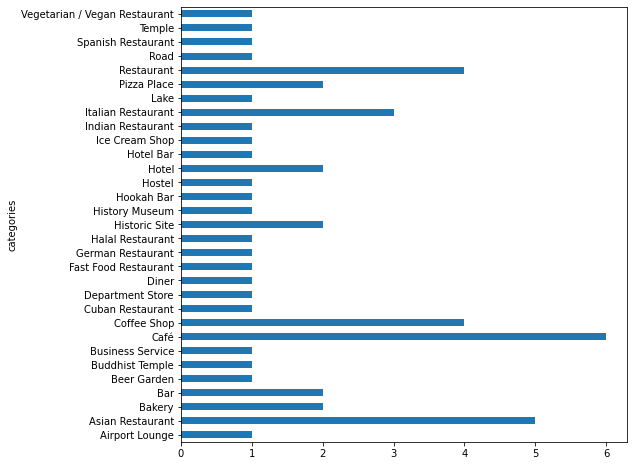

In [132]:
nearby_lat.plot(kind='barh',figsize=(8,8))

In [72]:
venues = getNearbyVenues(names=lat_data['Neighbourhood'],latitudes=lat_data['latitude'],longitudes=lat_data['longitude'])

Sanepa
Pulchowk
Jawalakhel
Lagankhel
Kanibahal


In [73]:
print(venues.shape)
venues.head()

(66, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sanepa,27.683772,85.309353,Top Of The World,27.680864,85.310422,Coffee Shop
1,Sanepa,27.683772,85.309353,Momotarou Restaurant,27.681818,85.305657,Japanese Restaurant
2,Sanepa,27.683772,85.309353,One Ugly Mug Coffee Bar,27.680893,85.310151,Coffee Shop
3,Sanepa,27.683772,85.309353,Bu Keba The Organic Village Restaurant,27.683407,85.312963,Restaurant
4,Sanepa,27.683772,85.309353,Summit Hotel,27.685633,85.311841,Hotel


In [74]:
venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Jawalakhel,36,36,36,36,36,36
Kanibahal,4,4,4,4,4,4
Lagankhel,4,4,4,4,4,4
Pulchowk,11,11,11,11,11,11
Sanepa,11,11,11,11,11,11


In [75]:
print('There are {} unique categories.'.format(len(venues['Venue Category'].unique())))

There are 33 unique categories.


In [76]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighbourhood'] = venues['Neighbourhood'] 

onehot.head()

,Asian Restaurant,Athletics & Sports,Bakery,Basketball Court,Bed & Breakfast,Breakfast Spot,Burger Joint,Bus Station,Business Service,Cafeteria,...,Latin American Restaurant,Malay Restaurant,Multiplex,Park,Pizza Place,Pool,Restaurant,Soccer Field,Temple,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sanepa
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sanepa
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sanepa
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Sanepa
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sanepa


In [77]:
onehot.shape

(66, 34)

In [78]:
grouped = onehot.groupby('Neighbourhood').mean().reset_index()
grouped

,Neighbourhood,Asian Restaurant,Athletics & Sports,Bakery,Basketball Court,Bed & Breakfast,Breakfast Spot,Burger Joint,Bus Station,Business Service,...,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Multiplex,Park,Pizza Place,Pool,Restaurant,Soccer Field,Temple
0,Jawalakhel,0.083333,0.000000,0.111111,0.00,0.000000,0.000000,0.027778,0.00,0.000000,...,0.027778,0.027778,0.027778,0.000000,0.000000,0.027778,0.000000,0.138889,0.000000,0.00
1,Kanibahal,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.25,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25
2,Lagankhel,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.25,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00
3,Pulchowk,0.000000,0.000000,0.000000,0.00,0.090909,0.000000,0.000000,0.00,0.090909,...,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.00
4,Sanepa,0.000000,0.090909,0.000000,0.00,0.000000,0.090909,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.090909,0.00


In [79]:
grouped.shape

(5, 34)

In [80]:
num_top_venues = 5

for hood in grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Jawalakhel----
               venue  freq
0               Café  0.19
1         Restaurant  0.14
2             Bakery  0.11
3   Asian Restaurant  0.08
4  Indian Restaurant  0.06


----Kanibahal----
                 venue  freq
0  Fried Chicken Joint  0.25
1     Basketball Court  0.25
2          Bus Station  0.25
3               Temple  0.25
4      Bed & Breakfast  0.00


----Lagankhel----
               venue  freq
0              Hotel  0.25
1         Restaurant  0.25
2  Indian Restaurant  0.25
3        Bus Station  0.25
4   Asian Restaurant  0.00


----Pulchowk----
                         venue  freq
0                         Café  0.18
1             Department Store  0.18
2                    Multiplex  0.09
3              Bed & Breakfast  0.09
4  Eastern European Restaurant  0.09


----Sanepa----
          venue  freq
0   Coffee Shop  0.18
1     Cafeteria  0.09
2  Soccer Field  0.09
3    Restaurant  0.09
4          Pool  0.09




In [81]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = grouped['Neighbourhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Jawalakhel,Café,Restaurant,Bakery,Asian Restaurant,Coffee Shop,Chinese Restaurant,Indian Restaurant,Malay Restaurant,Gym,Pizza Place
1,Kanibahal,Temple,Bus Station,Basketball Court,Fried Chicken Joint,Pizza Place,Department Store,Athletics & Sports,Bakery,Restaurant,Bed & Breakfast
2,Lagankhel,Bus Station,Restaurant,Hotel,Indian Restaurant,Business Service,Coffee Shop,Chinese Restaurant,Café,Cafeteria,Temple
3,Pulchowk,Café,Department Store,Dumpling Restaurant,Indian Restaurant,Eastern European Restaurant,Park,Multiplex,Bed & Breakfast,Business Service,Coffee Shop
4,Sanepa,Coffee Shop,Restaurant,Pool,Athletics & Sports,Soccer Field,Café,Breakfast Spot,Cafeteria,Japanese Restaurant,Hotel


In [82]:
# set number of clusters
kclusters = 5

grouped_clustering = grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 2, 3, 0], dtype=int32)

In [83]:
merged = lat_data



# add clustering labels

#merged['Cluster Labels'] = kmeans.labels_

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood' ,how='inner')
merged.head()
duo=merged

In [84]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12.5)
# set color scheme for the clustersx = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['latitude'], merged['longitude'], merged['Neighbourhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [85]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ward 2,17148,"(27.6837719, 85.309353)",0,Coffee Shop,Restaurant,Pool,Athletics & Sports,Soccer Field,Café,Breakfast Spot,Cafeteria,Japanese Restaurant,Hotel


In [86]:
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Ward 6, 7 and 8",89212,"(27.6667273, 85.3280068)",1,Temple,Bus Station,Basketball Court,Fried Chicken Joint,Pizza Place,Department Store,Athletics & Sports,Bakery,Restaurant,Bed & Breakfast


In [87]:
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Ward 5,8387,"(27.6668726, 85.3236357)",2,Bus Station,Restaurant,Hotel,Indian Restaurant,Business Service,Coffee Shop,Chinese Restaurant,Café,Cafeteria,Temple


In [88]:
merged.loc[merged['Cluster Labels'] == 3, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ward 3,8522,"(27.6783567, 85.3206084)",3,Café,Department Store,Dumpling Restaurant,Indian Restaurant,Eastern European Restaurant,Park,Multiplex,Bed & Breakfast,Business Service,Coffee Shop


In [89]:
merged.loc[merged['Cluster Labels'] == 4, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ward 4,7538,"(27.6724402, 85.3133757)",4,Café,Restaurant,Bakery,Asian Restaurant,Coffee Shop,Chinese Restaurant,Indian Restaurant,Malay Restaurant,Gym,Pizza Place


In [90]:
merged.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sanepa,Ward 2,Lalitpur,27.683772,85.309353,17148,"(27.6837719, 85.309353)",0,Coffee Shop,Restaurant,Pool,Athletics & Sports,Soccer Field,Café,Breakfast Spot,Cafeteria,Japanese Restaurant,Hotel
1,Pulchowk,Ward 3,Lalitpur,27.678357,85.320608,8522,"(27.6783567, 85.3206084)",3,Café,Department Store,Dumpling Restaurant,Indian Restaurant,Eastern European Restaurant,Park,Multiplex,Bed & Breakfast,Business Service,Coffee Shop
2,Jawalakhel,Ward 4,Lalitpur,27.672440,85.313376,7538,"(27.6724402, 85.3133757)",4,Café,Restaurant,Bakery,Asian Restaurant,Coffee Shop,Chinese Restaurant,Indian Restaurant,Malay Restaurant,Gym,Pizza Place
3,Lagankhel,Ward 5,Lalitpur,27.666873,85.323636,8387,"(27.6668726, 85.3236357)",2,Bus Station,Restaurant,Hotel,Indian Restaurant,Business Service,Coffee Shop,Chinese Restaurant,Café,Cafeteria,Temple
4,Kanibahal,"Ward 6, 7 and 8",Lalitpur,27.666727,85.328007,89212,"(27.6667273, 85.3280068)",1,Temple,Bus Station,Basketball Court,Fried Chicken Joint,Pizza Place,Department Store,Athletics & Sports,Bakery,Restaurant,Bed & Breakfast


#### XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [91]:
merge_bha=data1[data1['City'].str.contains('Bhaktapur')]
bha_data = merge_bha.reset_index(drop=True)
bha_data =bha_data.rename(columns={'Location':'Neighbourhood'}).head()
bha_data.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,mini Bus park,Ward 1,Bhaktapur,27.684014,85.422796,9901,"(27.68401389, 85.42279647)"
1,Duwakot,Ward 2,Bhaktapur,27.703937,85.455068,10553,"(27.70393659, 85.4550683)"
2,Nagarkot Road,Ward 4,Bhaktapur,27.688485,85.431673,8248,"(27.68848453, 85.43167256)"
3,Rammandir road,Ward 5,Bhaktapur,27.669910,85.430347,6425,"(27.66991041, 85.43034742)"
4,Incho - hanumanghat road,Ward 6,Bhaktapur,27.671735,85.435497,7212,"(27.67173475, 85.43549726)"


In [92]:
# create map of Toronto using latitude and longitude values
map_bha = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, neighbourhood in zip(bha_data['latitude'], bha_data['longitude'], bha_data['City'], bha_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_bha)  
    
map_bha

In [93]:
bha_data.loc[3, 'Neighbourhood']

'Rammandir road'

In [94]:
neighbourhood_latitude = bha_data.loc[0, 'latitude'] # neighbourhood latitude value
neighbourhood_longitude = bha_data.loc[0, 'longitude'] # neighbourhood longitude value

neighbourhood_name = bha_data.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of mini Bus park are 27.68401389, 85.42279647.


In [95]:
radius = 3000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PFMCEGVYKJ4VWFKRNXJKHUXUEAEFU0DD1RJUPLNRHSEJXLIX&client_secret=NSEGOTA1QSUTNLI02ZHR5QP4B1SFSB0VC0CQMD0BFSHOIEOG&v=20180605&ll=27.68401389,85.42279647&radius=3000&limit=100'

In [96]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '605f4507e2682c39ae0fe2c3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bhaktapur',
  'headerFullLocation': 'Bhaktapur',
  'headerLocationGranularity': 'city',
  'totalResults': 17,
  'suggestedBounds': {'ne': {'lat': 27.711013917000027,
    'lng': 85.45323001732294},
   'sw': {'lat': 27.65701386299997, 'lng': 85.39236292267705}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cc8ec23d338236a2ce59f7c',
       'name': 'Durbar Square',
       'location': {'address': 'Jagannath Rd',
        'lat': 27.67202088752247,
        'lng': 85.42833102713965,
        'labeledLatLngs': [{'label': 'display',
          'lat': 27.67202088752247,
          

In [97]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet
0,e-0-4cc8ec23d338236a2ce59f7c-0,0,"[{'summary': 'This spot is popular', 'type': '...",4cc8ec23d338236a2ce59f7c,Durbar Square,Jagannath Rd,27.672021,85.428331,"[{'label': 'display', 'lat': 27.67202088752247...",1442,44800,NP,Bhaktapur,Central Region,नेपाल,"[Jagannath Rd, Bhaktapur 44800, नेपाल]","[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",0,[],NaN
1,e-0-525f8df311d2535fb3f36482-1,0,"[{'summary': 'This spot is popular', 'type': '...",525f8df311d2535fb3f36482,Taumadi (Nyatapola) Square,NaN,27.671184,85.429287,"[{'label': 'display', 'lat': 27.6711835817726,...",1565,NaN,NP,Bhaktapur,Central Region,नेपाल,"[Bhaktapur, नेपाल]","[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",0,[],NaN
2,e-0-50bd7fa5e4b0624f8cadda31-2,0,"[{'summary': 'This spot is popular', 'type': '...",50bd7fa5e4b0624f8cadda31,Pottery Square,NaN,27.670035,85.427754,"[{'label': 'display', 'lat': 27.67003475489572...",1631,NaN,NP,Bhaktapur,Central Region,नेपाल,"[Bhaktapur, नेपाल]","[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",0,[],NaN
3,e-0-4efe9d806da1cd0357c0857e-3,0,"[{'summary': 'This spot is popular', 'type': '...",4efe9d806da1cd0357c0857e,Taumadhi Temple,NaN,27.671909,85.428543,"[{'label': 'display', 'lat': 27.67190901283443...",1461,NaN,NP,Bhaktapur,Central Region,नेपाल,"[Bhaktapur, नेपाल]","[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",0,[],NaN
4,e-0-54c0be65498e8530fda8951a-4,0,"[{'summary': 'This spot is popular', 'type': '...",54c0be65498e8530fda8951a,Peacock Guest House,NaN,27.673308,85.434916,"[{'label': 'display', 'lat': 27.673308, 'lng':...",1687,NaN,NP,NaN,NaN,नेपाल,[नेपाल],"[{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...",0,[],NaN
5,e-0-54420e1b498ef5da87d06c33-5,0,"[{'summary': 'This spot is popular', 'type': '...",54420e1b498ef5da87d06c33,Beans The Coffee Shop,Durbar Square Bhantapur,27.671690,85.428445,"[{'label': 'display', 'lat': 27.67169, 'lng': ...",1480,NaN,NP,NaN,NaN,नेपाल,"[Durbar Square Bhantapur, नेपाल]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN
6,e-0-4db966a4a86ee4fa7d36baa7-6,0,"[{'summary': 'This spot is popular', 'type': '...",4db966a4a86ee4fa7d36baa7,Shiva Guest House,NaN,27.671965,85.428458,"[{'label': 'display', 'lat': 27.67196457713246...",1452,NaN,NP,NaN,NaN,नेपाल,[नेपाल],"[{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...",0,[],NaN
7,e-0-50e67488e4b004474d3d2e9e-7,0,"[{'summary': 'This spot is popular', 'type': '...",50e67488e4b004474d3d2e9e,Namaste restaurant,NaN,27.671364,85.429326,"[{'label': 'display', 'lat': 27.671364, 'lng':...",1548,NaN,NP,NaN,NaN,नेपाल,[नेपाल],"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN
8,e-0-517692b7498ef6543e1ac2e7-8,0,"[{'summary': 'This spot is popular', 'type': '...",517692b7498ef6543e1ac2e7,Shiva Cafe Corner,NaN,27.671840,85.428604,"[{'label': 'display', 'lat': 27.67184, 'lng': ...",1471,NaN,NP,NaN,NaN,नेपाल,[नेपाल],"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN
9,e-0-4e45c044483b03d090d7563d-9,0,"[{'summary': 'This spot is popular', 'type': '...",4e45c044483b03d090d7563d,Planet Hotel Bhaktapur,"Jhaukhel vdc, 7 cha",27.681986,85.430316,"[{'label': 'display', 'lat': 27.68198573199795...",774,NaN,NP,Bhaktapur,Central Region,नेपाल,"[Jhaukhel vdc, 7 cha, Bhaktapur, नेपाल]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN


In [98]:
#venues

In [99]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_bha=nearby_venues
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Durbar Square,Plaza,27.672021,85.428331
1,Taumadi (Nyatapola) Square,Plaza,27.671184,85.429287
2,Pottery Square,Historic Site,27.670035,85.427754
3,Taumadhi Temple,Historic Site,27.671909,85.428543
4,Peacock Guest House,Hostel,27.673308,85.434916


In [100]:
nearby_venues['categories'].describe()

count       17
unique      11
top       Lake
freq         2
Name: categories, dtype: object

In [101]:
nearby_bha=pd.pivot_table(nearby_bha,columns=['categories'], aggfunc='size')
nearby_bha

categories
Bed & Breakfast         1
Bus Station             1
Café                    2
Himalayan Restaurant    1
Historic Site           2
Hostel                  2
Hotel                   2
Lake                    2
Plaza                   2
Restaurant              1
Shopping Plaza          1
dtype: int64

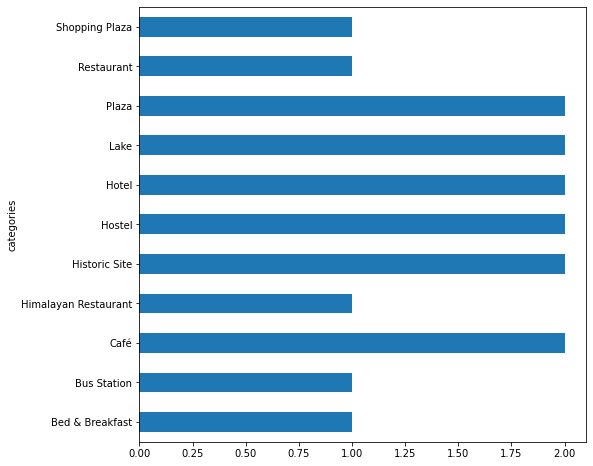

In [131]:
nearby_bha.plot(kind='barh',figsize=(8,8))

In [102]:
venues = getNearbyVenues(names=bha_data['Neighbourhood'],latitudes=bha_data['latitude'],longitudes=bha_data['longitude'])

mini Bus park
Duwakot
Nagarkot Road
Rammandir road
Incho - hanumanghat road


In [103]:
print(venues.shape)
venues.head()

(18, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rammandir road,27.66991,85.430347,Taumadi (Nyatapola) Square,27.671184,85.429287,Plaza
1,Rammandir road,27.66991,85.430347,Durbar Square,27.672021,85.428331,Plaza
2,Rammandir road,27.66991,85.430347,Pottery Square,27.670035,85.427754,Historic Site
3,Rammandir road,27.66991,85.430347,Taumadhi Temple,27.671909,85.428543,Historic Site
4,Rammandir road,27.66991,85.430347,Namaste restaurant,27.671364,85.429326,Café


In [104]:
venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Incho - hanumanghat road,4,4,4,4,4,4
Rammandir road,14,14,14,14,14,14


In [105]:
print('There are {} unique categories.'.format(len(venues['Venue Category'].unique())))

There are 12 unique categories.


In [106]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighbourhood'] = venues['Neighbourhood'] 

onehot.head()

,Asian Restaurant,Bed & Breakfast,Bus Station,Café,Coffee Shop,Himalayan Restaurant,Historic Site,Hostel,Hotel,Market,Plaza,Restaurant,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,1,0,Rammandir road
1,0,0,0,0,0,0,0,0,0,0,1,0,Rammandir road
2,0,0,0,0,0,0,1,0,0,0,0,0,Rammandir road
3,0,0,0,0,0,0,1,0,0,0,0,0,Rammandir road
4,0,0,0,1,0,0,0,0,0,0,0,0,Rammandir road


In [107]:
onehot.shape

(18, 13)

In [108]:
grouped = onehot.groupby('Neighbourhood').mean().reset_index()
grouped

,Neighbourhood,Asian Restaurant,Bed & Breakfast,Bus Station,Café,Coffee Shop,Himalayan Restaurant,Historic Site,Hostel,Hotel,Market,Plaza,Restaurant
0,Incho - hanumanghat road,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.25,0.25,0.000000,0.250000
1,Rammandir road,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.142857,0.142857,0.00,0.00,0.142857,0.071429


In [109]:
grouped.shape

(2, 13)

In [110]:
num_top_venues = 5

for hood in grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Incho - hanumanghat road----
              venue  freq
0            Hostel  0.25
1             Hotel  0.25
2            Market  0.25
3        Restaurant  0.25
4  Asian Restaurant  0.00


----Rammandir road----
              venue  freq
0              Café  0.14
1     Historic Site  0.14
2            Hostel  0.14
3             Plaza  0.14
4  Asian Restaurant  0.07




In [111]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = grouped['Neighbourhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Incho - hanumanghat road,Restaurant,Market,Hotel,Hostel,Plaza,Historic Site,Himalayan Restaurant,Coffee Shop,Café,Bus Station
1,Rammandir road,Plaza,Hostel,Historic Site,Café,Restaurant,Himalayan Restaurant,Coffee Shop,Bus Station,Bed & Breakfast,Asian Restaurant


In [112]:
# set number of clusters
kclusters = 2

grouped_clustering = grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1], dtype=int32)

In [113]:
neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Incho - hanumanghat road,Restaurant,Market,Hotel,Hostel,Plaza,Historic Site,Himalayan Restaurant,Coffee Shop,Café,Bus Station
1,Rammandir road,Plaza,Hostel,Historic Site,Café,Restaurant,Himalayan Restaurant,Coffee Shop,Bus Station,Bed & Breakfast,Asian Restaurant


In [114]:
merged = bha_data
merged.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
0,mini Bus park,Ward 1,Bhaktapur,27.684014,85.422796,9901,"(27.68401389, 85.42279647)"
1,Duwakot,Ward 2,Bhaktapur,27.703937,85.455068,10553,"(27.70393659, 85.4550683)"
2,Nagarkot Road,Ward 4,Bhaktapur,27.688485,85.431673,8248,"(27.68848453, 85.43167256)"
3,Rammandir road,Ward 5,Bhaktapur,27.669910,85.430347,6425,"(27.66991041, 85.43034742)"
4,Incho - hanumanghat road,Ward 6,Bhaktapur,27.671735,85.435497,7212,"(27.67173475, 85.43549726)"


In [115]:
# add clustering labels

#merged['Cluster Labels'] = kmeans.labels_

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood' ,how='inner')

tres=merged
merged.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Rammandir road,Ward 5,Bhaktapur,27.669910,85.430347,6425,"(27.66991041, 85.43034742)",1,Plaza,Hostel,Historic Site,Café,Restaurant,Himalayan Restaurant,Coffee Shop,Bus Station,Bed & Breakfast,Asian Restaurant
4,Incho - hanumanghat road,Ward 6,Bhaktapur,27.671735,85.435497,7212,"(27.67173475, 85.43549726)",0,Restaurant,Market,Hotel,Hostel,Plaza,Historic Site,Himalayan Restaurant,Coffee Shop,Café,Bus Station


In [116]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12.5)
# set color scheme for the clustersx = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['latitude'], merged['longitude'], merged['Neighbourhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [117]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Ward 6,7212,"(27.67173475, 85.43549726)",0,Restaurant,Market,Hotel,Hostel,Plaza,Historic Site,Himalayan Restaurant,Coffee Shop,Café,Bus Station


In [118]:
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Ward 5,6425,"(27.66991041, 85.43034742)",1,Plaza,Hostel,Historic Site,Café,Restaurant,Himalayan Restaurant,Coffee Shop,Bus Station,Bed & Breakfast,Asian Restaurant


In [119]:
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [120]:
merged.loc[merged['Cluster Labels'] == 3, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [121]:
merged.loc[merged['Cluster Labels'] == 4, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Ward,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [122]:
merged.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Rammandir road,Ward 5,Bhaktapur,27.669910,85.430347,6425,"(27.66991041, 85.43034742)",1,Plaza,Hostel,Historic Site,Café,Restaurant,Himalayan Restaurant,Coffee Shop,Bus Station,Bed & Breakfast,Asian Restaurant
4,Incho - hanumanghat road,Ward 6,Bhaktapur,27.671735,85.435497,7212,"(27.67173475, 85.43549726)",0,Restaurant,Market,Hotel,Hostel,Plaza,Historic Site,Himalayan Restaurant,Coffee Shop,Café,Bus Station


#### XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [123]:
uno.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)",0,American Restaurant,Shopping Mall,Café,Restaurant,Burger Joint,Multiplex,Gym / Fitness Center,Football Stadium,Food Court,Fast Food Restaurant
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)",1,Hotel,Café,Restaurant,Asian Restaurant,Himalayan Restaurant,Bar,Vietnamese Restaurant,Jazz Club,Hotel Bar,Ice Cream Shop
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)",4,Asian Restaurant,French Restaurant,Chinese Restaurant,Yoga Studio,Farm,Comfort Food Restaurant,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)",0,Breakfast Spot,Café,Restaurant,Diner,Bakery,Fast Food Restaurant,Department Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)",0,Asian Restaurant,Café,Restaurant,American Restaurant,Gym,Fried Chicken Joint,Diner,Department Store,Korean Restaurant,Coffee Shop


In [124]:
duo.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sanepa,Ward 2,Lalitpur,27.683772,85.309353,17148,"(27.6837719, 85.309353)",0,Coffee Shop,Restaurant,Pool,Athletics & Sports,Soccer Field,Café,Breakfast Spot,Cafeteria,Japanese Restaurant,Hotel
1,Pulchowk,Ward 3,Lalitpur,27.678357,85.320608,8522,"(27.6783567, 85.3206084)",3,Café,Department Store,Dumpling Restaurant,Indian Restaurant,Eastern European Restaurant,Park,Multiplex,Bed & Breakfast,Business Service,Coffee Shop
2,Jawalakhel,Ward 4,Lalitpur,27.672440,85.313376,7538,"(27.6724402, 85.3133757)",4,Café,Restaurant,Bakery,Asian Restaurant,Coffee Shop,Chinese Restaurant,Indian Restaurant,Malay Restaurant,Gym,Pizza Place
3,Lagankhel,Ward 5,Lalitpur,27.666873,85.323636,8387,"(27.6668726, 85.3236357)",2,Bus Station,Restaurant,Hotel,Indian Restaurant,Business Service,Coffee Shop,Chinese Restaurant,Café,Cafeteria,Temple
4,Kanibahal,"Ward 6, 7 and 8",Lalitpur,27.666727,85.328007,89212,"(27.6667273, 85.3280068)",1,Temple,Bus Station,Basketball Court,Fried Chicken Joint,Pizza Place,Department Store,Athletics & Sports,Bakery,Restaurant,Bed & Breakfast


In [125]:
tres.head()

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Rammandir road,Ward 5,Bhaktapur,27.669910,85.430347,6425,"(27.66991041, 85.43034742)",1,Plaza,Hostel,Historic Site,Café,Restaurant,Himalayan Restaurant,Coffee Shop,Bus Station,Bed & Breakfast,Asian Restaurant
4,Incho - hanumanghat road,Ward 6,Bhaktapur,27.671735,85.435497,7212,"(27.67173475, 85.43549726)",0,Restaurant,Market,Hotel,Hostel,Plaza,Historic Site,Himalayan Restaurant,Coffee Shop,Café,Bus Station


In [126]:
mer=uno
mer=mer.append(duo,ignore_index=True)
mer=mer.append(tres,ignore_index=True)
mer

,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,5795,"(27.7126782, 85.3287033)",0,American Restaurant,Shopping Mall,Café,Restaurant,Burger Joint,Multiplex,Gym / Fitness Center,Football Stadium,Food Court,Fast Food Restaurant
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)",1,Hotel,Café,Restaurant,Asian Restaurant,Himalayan Restaurant,Bar,Vietnamese Restaurant,Jazz Club,Hotel Bar,Ice Cream Shop
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,11300,"(27.7330791, 85.3288072)",4,Asian Restaurant,French Restaurant,Chinese Restaurant,Yoga Studio,Farm,Comfort Food Restaurant,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)",0,Breakfast Spot,Café,Restaurant,Diner,Bakery,Fast Food Restaurant,Department Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)",0,Asian Restaurant,Café,Restaurant,American Restaurant,Gym,Fried Chicken Joint,Diner,Department Store,Korean Restaurant,Coffee Shop
5,Sanepa,Ward 2,Lalitpur,27.683772,85.309353,17148,"(27.6837719, 85.309353)",0,Coffee Shop,Restaurant,Pool,Athletics & Sports,Soccer Field,Café,Breakfast Spot,Cafeteria,Japanese Restaurant,Hotel
6,Pulchowk,Ward 3,Lalitpur,27.678357,85.320608,8522,"(27.6783567, 85.3206084)",3,Café,Department Store,Dumpling Restaurant,Indian Restaurant,Eastern European Restaurant,Park,Multiplex,Bed & Breakfast,Business Service,Coffee Shop
7,Jawalakhel,Ward 4,Lalitpur,27.672440,85.313376,7538,"(27.6724402, 85.3133757)",4,Café,Restaurant,Bakery,Asian Restaurant,Coffee Shop,Chinese Restaurant,Indian Restaurant,Malay Restaurant,Gym,Pizza Place
8,Lagankhel,Ward 5,Lalitpur,27.666873,85.323636,8387,"(27.6668726, 85.3236357)",2,Bus Station,Restaurant,Hotel,Indian Restaurant,Business Service,Coffee Shop,Chinese Restaurant,Café,Cafeteria,Temple
9,Kanibahal,"Ward 6, 7 and 8",Lalitpur,27.666727,85.328007,89212,"(27.6667273, 85.3280068)",1,Temple,Bus Station,Basketball Court,Fried Chicken Joint,Pizza Place,Department Store,Athletics & Sports,Bakery,Restaurant,Bed & Breakfast


In [127]:
mer.groupby('City')


In [128]:
mer_data=pandas.concat([bha_data,lat_data,kat_data],ignore_index=True)
mer_data.sort_values(by='Population Density (per sq km)',ascending=False).head()


,Neighbourhood,Ward,City,latitude,longitude,Population Density (per sq km),Coordinates
9,Kanibahal,"Ward 6, 7 and 8",Lalitpur,27.666727,85.328007,89212,"(27.6667273, 85.3280068)"
14,Tangal,Ward 5,Kathmandu,27.717231,85.330449,23263,"(27.7172307, 85.3304488)"
5,Sanepa,Ward 2,Lalitpur,27.683772,85.309353,17148,"(27.6837719, 85.309353)"
11,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,16438,"(27.7215082, 85.3207646)"
13,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,14139,"(27.7246028, 85.3310167)"
